In [1]:
import math
from collections import Counter
from matplotlib import pyplot as plt
import random
import pandas as pd
import os
import sys
module_path1 = os.path.abspath(os.path.join('C:\\Users\\User\\Documents\\GitHub\\DataScience_study\\data_science_package'))
if module_path1 not in sys.path:
    sys.path.append(module_path1)
from linear import shape, get_row, get_column, make_matrix, vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
from Statistics import correlation, standard_deviation, mean


In [2]:
def bucketize(point, bucket_size):
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    return (Counter(bucketize(point, bucket_size) for point in points))

def plot_histogram(points, bucket_size, title =''):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
    plt.title(title)
    plt.show()

In [3]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2 

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

In [4]:
uniform = [200 * random.random() - 100
          for _ in range(10000)]

normal = [57 * inverse_normal_cdf(random.random())
         for _ in range(10000)]

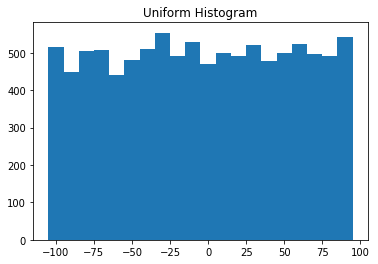

In [5]:
plot_histogram(uniform, 10, "Uniform Histogram")

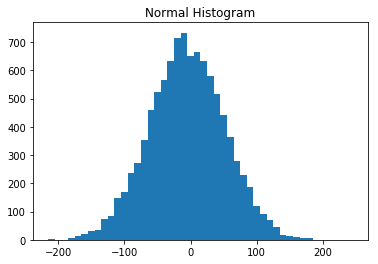

In [6]:
plot_histogram(normal, 10, "Normal Histogram")

In [7]:
def random_normal():
    return inverse_normal_cdf(random.random())

In [8]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() /2 for x in xs]
ys2 = [-x + random_normal() /2 for x in xs]

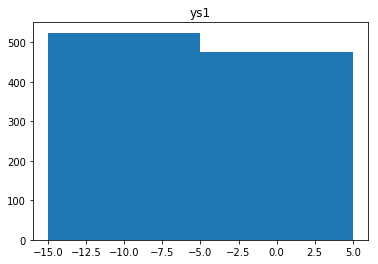

In [9]:
plot_histogram(ys1, 10, 'ys1')

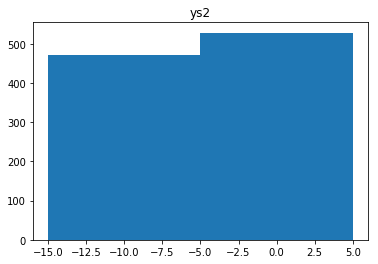

In [10]:
plot_histogram(ys2, 10, 'ys2')

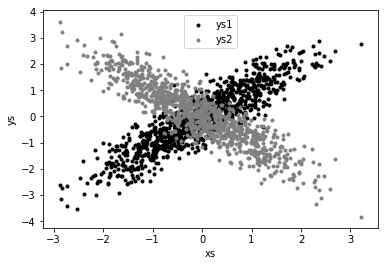

In [11]:
plt.scatter(xs,ys1, marker = '.', color = 'black', label = 'ys1')
plt.scatter(xs, ys2, marker = '.', color = 'gray', label = 'ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)

In [12]:
correlation(xs,ys1)

0.8992169833329068

In [13]:
correlation(xs,ys2)

-0.8957526116154084

In [15]:
def correlation_matrix(data):
    num_row, num_columns = shape(data)
    
    def matrix_entry(i,j):
        return correlation(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)

In [39]:
data = [
    {'closing_price':102.06,
    'date': datetime.datetime(2014,8,29,0,0),
    'symbol':'AAPL'}
]

NameError: name 'datetime' is not defined

In [43]:
def parse_row(input_row,parsers):
    return [try_or_none(parser)(value) if parser is not None else value
           for value,parser in zip(input_row,parsers)]

In [44]:
def parse_rows_with(reader, parsers):
    for row in reader:
        yield parse_row(row,parsers)

In [45]:
def try_or_none(f):
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

In [49]:
import dateutil.parser
import math, random, csv

In [50]:
data =[]

In [61]:
with open("C://Users//Danniel//Documents//GitHub//DataScience_study//comma_delimited_stock_prices.csv", 'r',) as f:
    reader = csv.reader(f)
    for line in parse_rows_with(reader,[dateutil.parser.parse, None, float]):
        data.append(line)
        print (line)

[None, 'AAPL', 90.91]
[datetime.datetime(2014, 6, 20, 0, 0), 'MSFT', 41.68]
[datetime.datetime(3014, 6, 20, 0, 0), 'FB', 64.5]
[datetime.datetime(2014, 6, 19, 0, 0), 'AAPL', 91.86]
[datetime.datetime(2014, 6, 19, 0, 0), 'MSFT', None]
[datetime.datetime(2014, 6, 19, 0, 0), 'FB', 64.34]


In [55]:
for row in data:
    if any(x is None for x in row):
        print (row)

[None, 'AAPL', 90.91]
[datetime.datetime(2014, 6, 19, 0, 0), 'MSFT', None]


In [56]:
data

[[None, 'AAPL', 90.91],
 [datetime.datetime(2014, 6, 20, 0, 0), 'MSFT', 41.68],
 [datetime.datetime(3014, 6, 20, 0, 0), 'FB', 64.5],
 [datetime.datetime(2014, 6, 19, 0, 0), 'AAPL', 91.86],
 [datetime.datetime(2014, 6, 19, 0, 0), 'MSFT', None],
 [datetime.datetime(2014, 6, 19, 0, 0), 'FB', 64.34]]